In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
df=pd.read_csv("/content/Training.csv")
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


In [3]:
df.drop('Unnamed: 133', axis=1, inplace=True)

In [4]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [6]:
df.shape

(4920, 133)

In [7]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [8]:
df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [9]:
corr_matrix = df.corr()
plt.figure(figsize=(90, 70))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

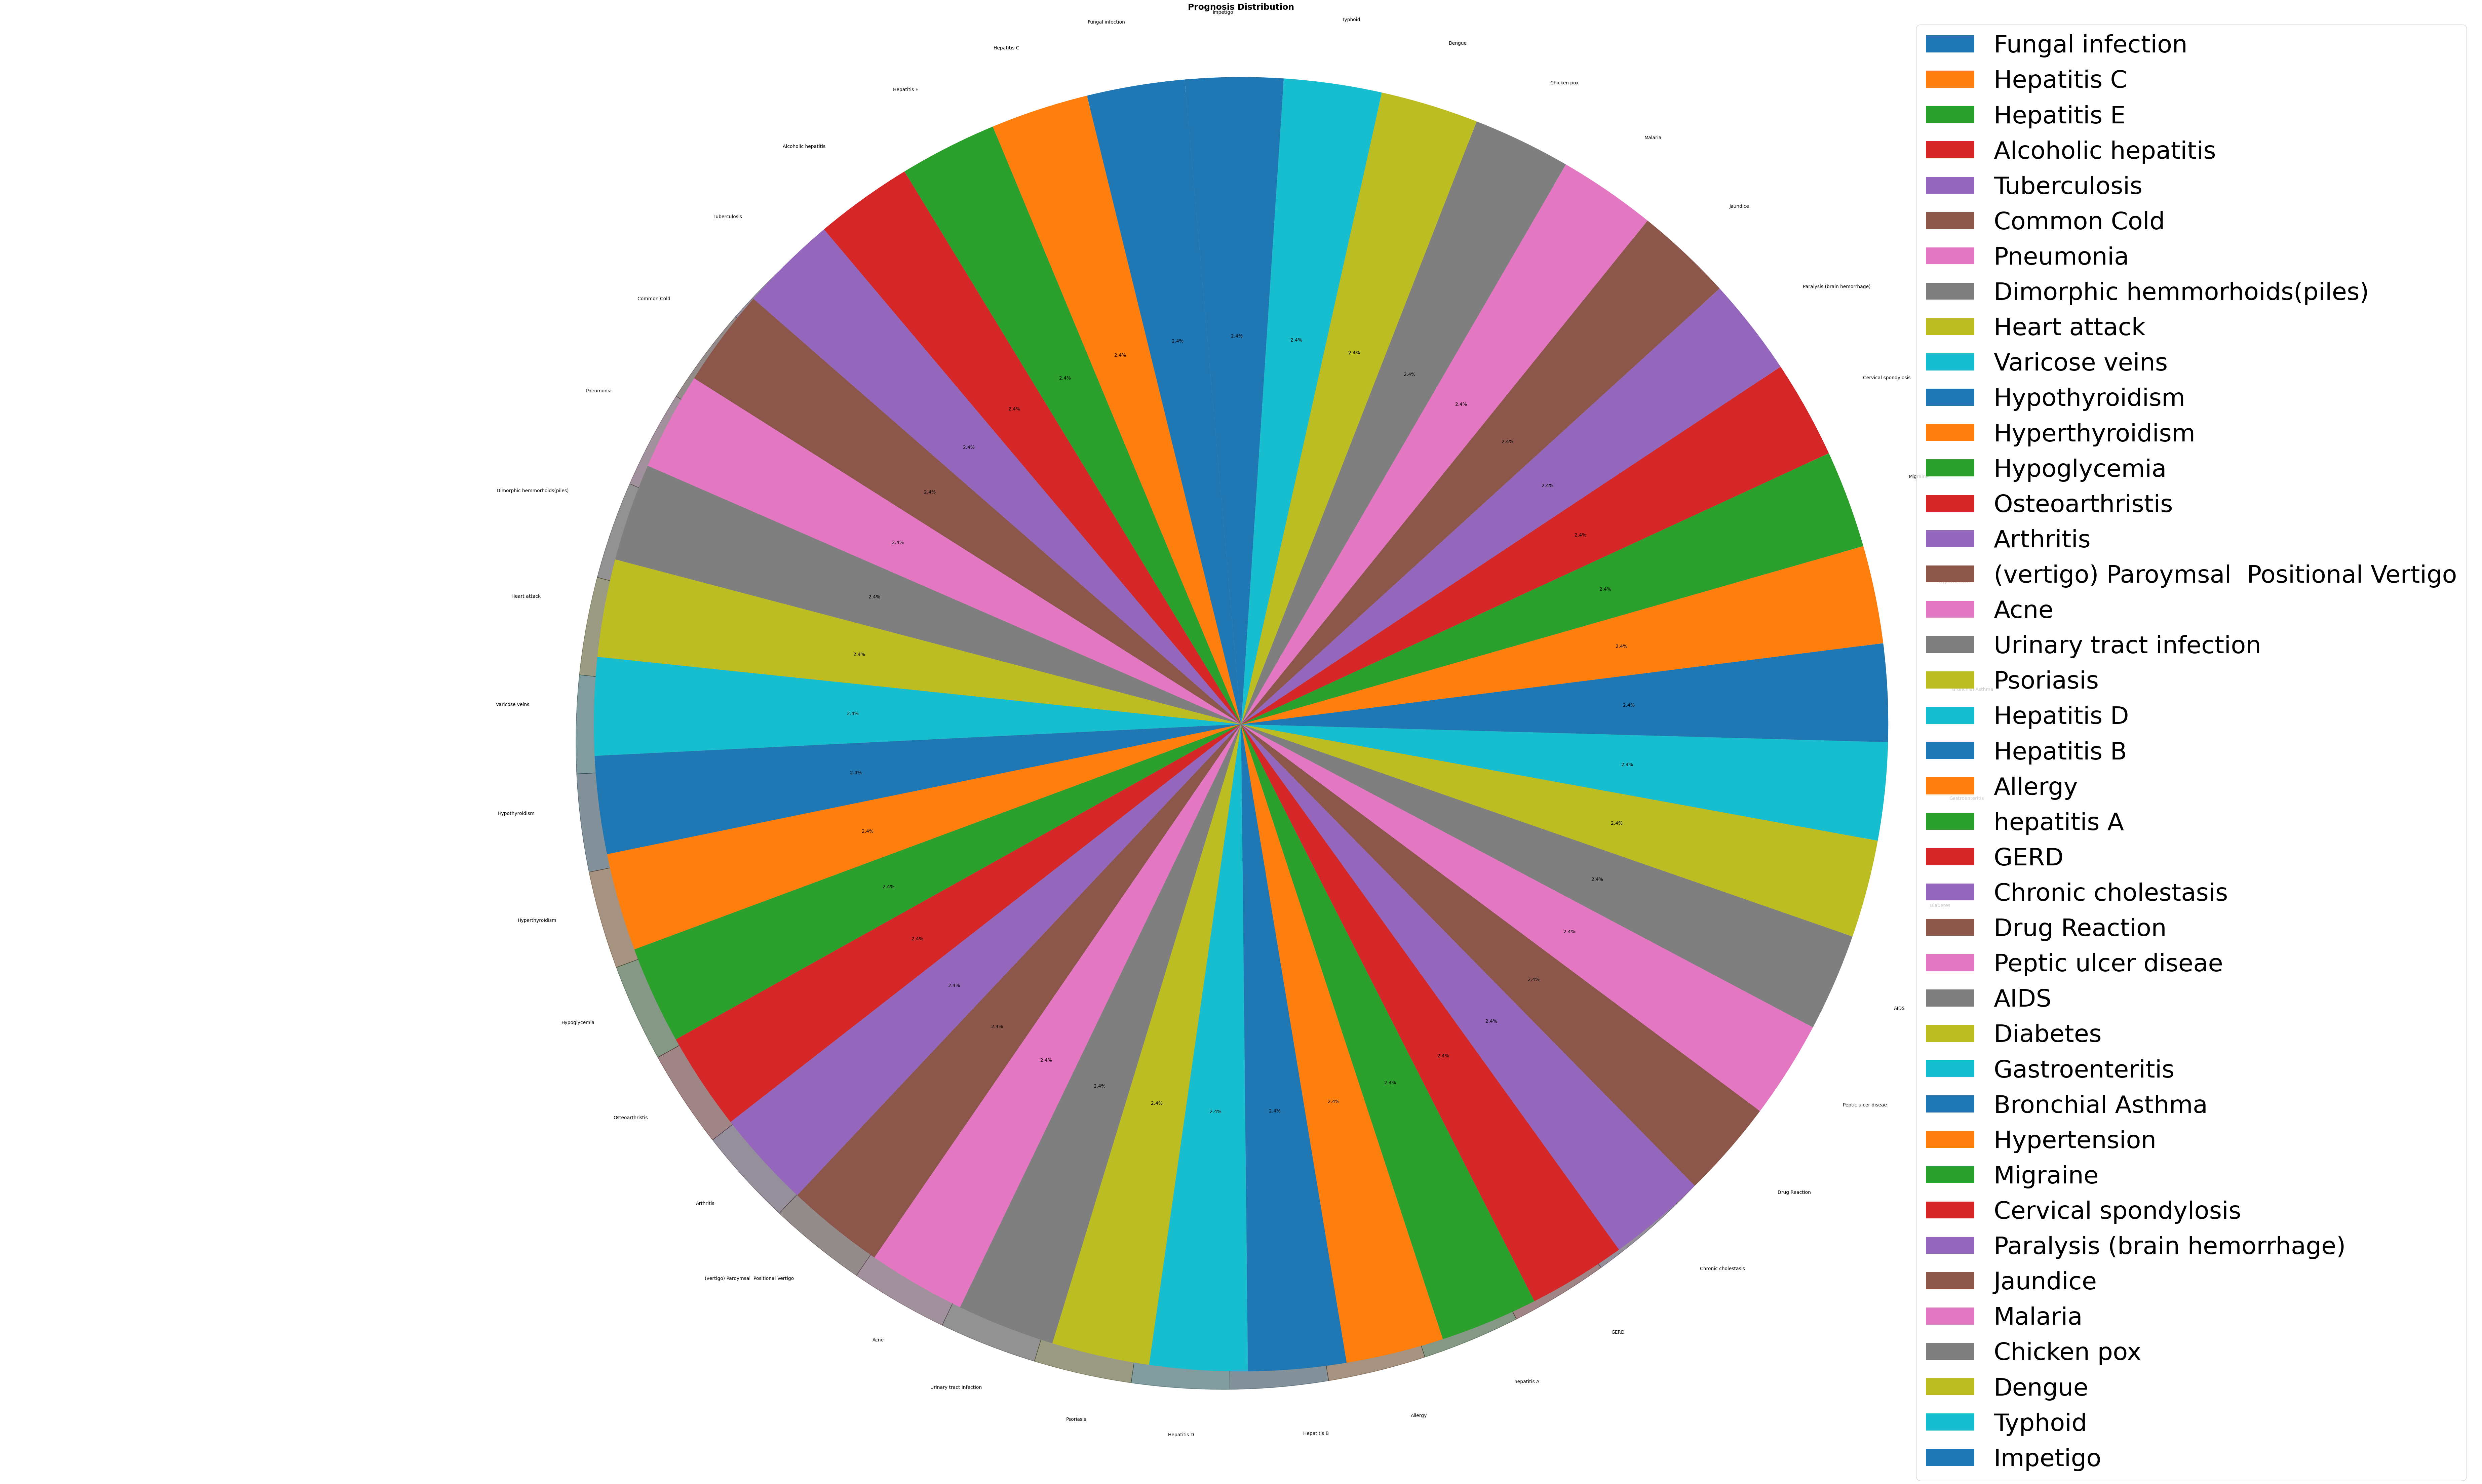

In [10]:
plt.figure(figsize=(95, 55))
category_counts = df['prognosis'].value_counts()
plt.pie(category_counts, labels=category_counts.index,  autopct='%1.1f%%', shadow=True, startangle=95)
plt.title('Prognosis Distribution', fontsize=18, fontweight='bold')
plt.legend(category_counts.index, loc='best', fontsize=52)
plt.axis('equal')
plt.show()

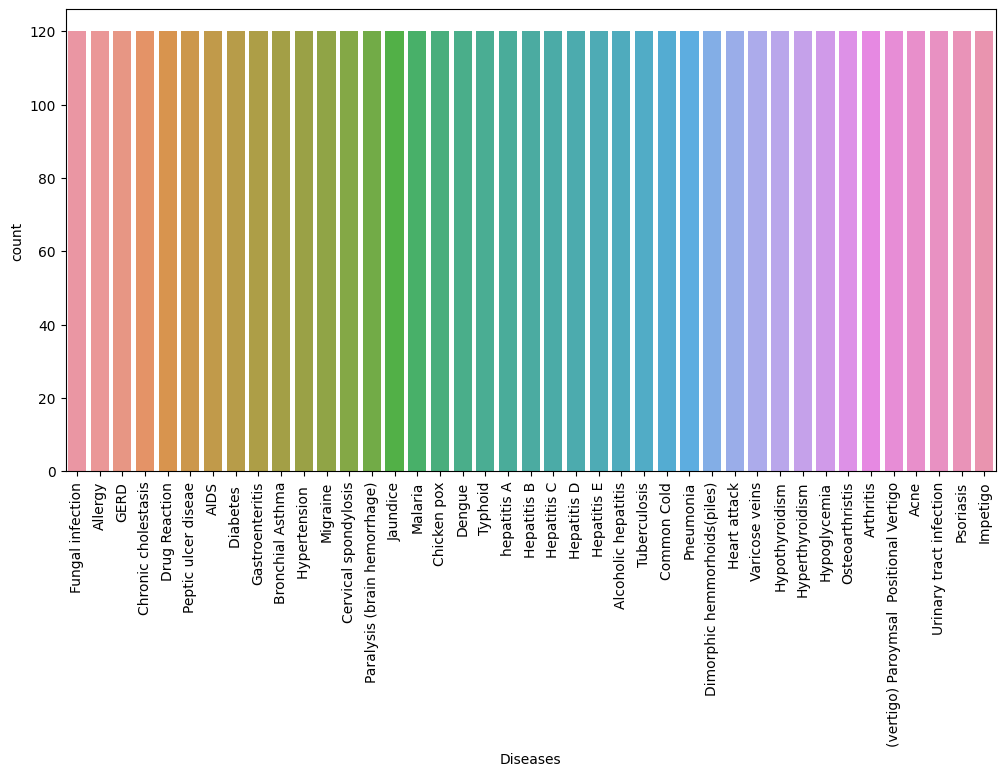

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='prognosis')
plt.xticks(rotation=90)
plt.xlabel('Diseases');

In [12]:
x=df.drop('prognosis',axis=1)
y=df[['prognosis']]

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=200)

In [14]:
# Random Forest Classifier
rmf= RandomForestClassifier()
rmf.fit(x_train, y_train)
rmf_pred = rmf.predict(x_test)
rmf_acc = accuracy_score(y_test, rmf_pred)

print("Random Forest Classifier:")
print("Accuracy on test set: {:.2f}%".format(rmf_acc*100))

<ipython-input-14-44d4eb6528b7>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rmf.fit(x_train, y_train)


Random Forest Classifier:
Accuracy on test set: 100.00%


In [15]:
# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)
dt_acc = accuracy_score(y_test, dt_pred)

print("Decision Tree Classifier:")
print("Accuracy on test set: {:.2f}%".format(dt_acc * 100))

Decision Tree Classifier:
Accuracy on test set: 100.00%


In [16]:
# Logistic Regression Classifier
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_acc = accuracy_score(y_test, lr_pred)
lr_confidence = lr.predict_proba(x_test)

print("Logistic Regression Classifier:")
print("Accuracy on test set: {:.2f}%".format(lr_acc * 100))

# Print confidence scores for Logistic Regression predictions
print("Confidence scores for Logistic Regression predictions:")
print(lr_confidence)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Classifier:
Accuracy on test set: 100.00%
Confidence scores for Logistic Regression predictions:
[[7.43814954e-05 2.25731954e-04 2.28928526e-04 ... 5.85953026e-05
  1.16494323e-04 6.21829490e-05]
 [9.73756390e-01 6.83402023e-04 7.04151766e-04 ... 7.74093202e-04
  3.99143393e-04 3.63688927e-04]
 [7.54574235e-04 1.42186903e-03 3.02481960e-04 ... 3.69234058e-04
  2.20374379e-04 1.66071612e-03]
 ...
 [1.10976638e-04 1.17377999e-03 1.02294593e-03 ... 2.98351943e-04
  1.64729395e-04 3.67060099e-05]
 [8.02807275e-04 5.14434410e-05 7.36527234e-05 ... 7.85522446e-05
  1.22971435e-04 2.41447819e-05]
 [1.60499550e-05 2.53043273e-04 7.63626230e-05 ... 9.39963361e-05
  1.39006938e-04 5.26205026e-06]]


In [17]:
model_params={
    'SVM':{
        'model':SVC(gamma='auto'),
        'params':{
            'C':[10,20,30,40],
            'kernel':['rbf','linear']
        }
    },
    'randomforest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,2,3,5]
        }
    },
    'decisiontree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['entropy','gini']
        }
    },
    'naivebayes':{
        'model':GaussianNB(),
        'params':{}
    }
}

In [18]:
from sklearn.model_selection import GridSearchCV
scores=[]
for model_name,mp in model_params.items():
    GS=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    GS.fit(x,y)
    scores.append({
        'model':model_name,
        'best_score':GS.best_score_,
        'best_params':GS.best_params_
    })

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [19]:
s=[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

s_reshaped = np.array(s).reshape(1, -1)

lr_confidence = lr.predict_proba(s_reshaped)
print(lr_confidence)
lr_pred = lr.predict(s_reshaped)
print(lr_pred)
max_confidence = max(lr_confidence[0])
print("Maximum confidence:", max_confidence)


[[1.32798359e-03 3.00351473e-03 1.34836934e-02 4.63459167e-03
  4.05896474e-03 2.80415422e-03 1.40448795e-03 2.76961618e-03
  1.29070884e-02 1.62319280e-02 6.15054738e-04 5.47601033e-04
  3.18196687e-03 3.07872138e-03 3.14641154e-02 8.32891639e-01
  1.61105780e-03 2.99802724e-03 3.12159909e-03 7.69027090e-03
  4.76478634e-03 1.67079387e-04 1.89872399e-03 2.39328830e-03
  9.05510275e-04 6.31429706e-04 2.20296353e-03 7.90925476e-03
  7.68795120e-03 7.80151137e-04 1.47339926e-03 2.10067685e-03
  2.69164792e-03 1.02335775e-03 9.17267235e-04 6.25528398e-03
  2.47213913e-04 3.82520177e-04 3.10696752e-03 1.76515425e-03
  8.69296148e-04]]
['Fungal infection']
Maximum confidence: 0.8328916390347001


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [20]:
print(scores)

[{'model': 'SVM', 'best_score': 1.0, 'best_params': {'C': 10, 'kernel': 'rbf'}}, {'model': 'randomforest', 'best_score': 1.0, 'best_params': {'n_estimators': 3}}, {'model': 'decisiontree', 'best_score': 1.0, 'best_params': {'criterion': 'entropy'}}, {'model': 'naivebayes', 'best_score': 1.0, 'best_params': {}}]


In [21]:
def collect_user_values():
    try:
        # Get user input as a string
        input_string = input("Enter the Values separated by commas: ")

        # Split the input string into a list of values
        values = [int(value.strip()) for value in input_string.split(',')]

        return values
    except ValueError:
        print("Invalid input. Please enter numeric values separated by commas.")

# Call the function to collect user values
s = collect_user_values()

# Print the collected user values
print("Collected user values:", s)

s_reshaped = np.array(s).reshape(1, -1)

lr_confidence = lr.predict_proba(s_reshaped)
print(lr_confidence)
lr_pred = lr.predict(s_reshaped)
print(lr_pred)
max_confidence = max(lr_confidence[0])
print("Maximum confidence:", max_confidence)


Enter the Values separated by commas: 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
Collected user values: [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[1.32798359e-03 3.00351473e-03 1.34836934e-02 4.63459167e-03
  4.05896474e-03 2.80415422e-03 1.40448795e-03 2.76961618e-03
  1.29070884e-02 1.623

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
